In [150]:
import pandas as pd
import os
import matplotlib.pyplot as plt

variablesKey = 'Validators'
variablesSplit = 'l2_relative_error_'
validatorsRename = {'validator':'r1.0','validator_2':'r0.85','validator_3':'r0.75'}
variablesID = 'validator'
#TODO get subfolders automatically
subfolders = [#'Baseline_1024x8000',
              'Baseline_1024x8000_75-11',
              '11-XuvYuv_lVcm',
              #'NV-Importance',
              '11-NV-Importance',
              #'Full_Size_Baseline',
              'Full_Size_Baseline_75-11'
              ] ##UPDATE
legendNames = ['Uniform_1024','SGM-S-PINN_1024','MIS_1024','Uniform_4096']
# run aggregates with these subfoldetrs
#folder = 'C:/Users/jacec/Documents/Test_Runs/'
folder = 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/'
#folder = 'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/'
#aggregates = [folder+f+'/aggregates/' for f in os.listdir(folder) if os.path.isdir(folder+f)][0:1]
aggregates = [folder+f+'/aggregates/' for f in ['Annular_Ring_Parameterized_75-11'] if os.path.isdir(folder+f)] ##UPDATE
#all results will be in /aggregates, separated by tags from subfolders
#find all validation files separated by subfolder
files = []
#for i in aggregates:
#    csvs_by_testcase = [[i + g for g in os.listdir(i) if (g.endswith('.csv')) and (variablesKey in g) and (f in g)] for f in subfolders]
#    files = files+[i for i in csvs_by_testcase if i]
files = [[i+g for g in os.listdir(i) if g.endswith('.csv') and (variablesKey in g)] for i in aggregates]
#files = [[aggregates + g for g in os.listdir(aggregates) if ('.csv' in g) and (f in g)] for f in subfolders] 
#list of lists of the files for each individual aggregation
#Go through sub-list, load into dataframes with descriptive columns
#Find unique variables, create sub-frames with them in a format for plotting



In [151]:
files

[['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-11-NV-Importance-Annular_Ring_Parameterized_75-11.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-11-XuvYuv_lVcm-Annular_Ring_Parameterized_75-11.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-Baseline_1024x8000-Annular_Ring_Parameterized_75-11.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-Baseline_1024x8000_75-11-Annular_Ring_Parameterized_75-11.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-Full_Size_Baseline-Annular_Ring_Parameterized_75-11.csv',
  'C:

In [152]:
#each aggregate becomes one dataframe
#extract common variable names (validator, validator_n, uvpvnu)
#load into df with descriptive columns, uses 'subfolder' name, validator name, variable name
dataframes = []
agNames = []
for aggregation in files:
    dfs = []
    agName = aggregation[0].split('/aggregates/')[0].split('/')[-1]
    for testName in subfolders:
        subtests = [csv for csv in aggregation if testName in csv]
        if not subtests:
            continue
        print(subtests)
        for k,i in enumerate(subtests):
            validatorName = i.split(variablesKey)[1].split(variablesSplit)[0]
            vv = i.split(variablesSplit)[1].split('-'+testName)[0]
            variableName = f'{testName}_{validatorsRename[validatorName]}_{vv}_'
            print(variableName)
            #df = pd.read_csv(i, index_col = 0, delimiter=';')
            df = pd.read_csv(i, delimiter=';')
            oldcols = df.keys()
            print(oldcols)
            #mapping = {i:variableName+i for i in oldcols[0:-1]}
            mapping = {'Unnamed: 0':variableName+'step'}
            if k == 0:
                mapping.update({'wall_time':testName+'_wall_time'})
            mapping.update({i:variableName+i for i in oldcols[1:-1]})
            print(mapping)
            df.rename(columns=mapping, inplace=True)
            newcols = df.keys()
            print(newcols)
            if k > 0:
                df.drop(columns='wall_time')
            dfs.append(df)
    df = pd.concat(dfs, axis=1)
    df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicates based on column name alone
    #append to dataframes list
    dataframes.append(df)
    agNames.append(agName)

['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_p-Baseline_1024x8000_75-11-Annular_Ring_Parameterized_75-11.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_u-Baseline_1024x8000_75-11-Annular_Ring_Parameterized_75-11.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidatorl2_relative_error_v-Baseline_1024x8000_75-11-Annular_Ring_Parameterized_75-11.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidator_2l2_relative_error_p-Baseline_1024x8000_75-11-Annular_Ring_Parameterized_75-11.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/Annular_Ring_Parameterized_75-11/aggregates/Validatorsvalidator_2l2_relative_error_u-Baseline_1024x8000_75-11-Annular_Ring_Parame

In [153]:
dataframes[0]
agNames

['Annular_Ring_Parameterized_75-11']

[['Baseline_1024x8000_75-11_r1.0_p_step', 'Baseline_1024x8000_75-11_r1.0_p_mean', '11-XuvYuv_lVcm_r1.0_p_mean', '11-NV-Importance_r1.0_p_mean', 'Full_Size_Baseline_75-11_r1.0_p_mean'], ['Baseline_1024x8000_75-11_r0.85_p_step', 'Baseline_1024x8000_75-11_r0.85_p_mean', '11-XuvYuv_lVcm_r0.85_p_mean', '11-NV-Importance_r0.85_p_mean', 'Full_Size_Baseline_75-11_r0.85_p_mean'], ['Baseline_1024x8000_75-11_r0.75_p_step', 'Baseline_1024x8000_75-11_r0.75_p_mean', '11-XuvYuv_lVcm_r0.75_p_mean', '11-NV-Importance_r0.75_p_mean', 'Full_Size_Baseline_75-11_r0.75_p_mean']]
[('Baseline_1024x8000_75-11_r1.0_p_step', 350000), ('Baseline_1024x8000_75-11_r1.0_p_mean', 0.0881275117397308), ('11-XuvYuv_lVcm_r1.0_p_mean', 0.0814367964863777), ('11-NV-Importance_r1.0_p_mean', 0.1035114035010337), ('Full_Size_Baseline_75-11_r1.0_p_mean', 0.0986334443092346)]
[('Baseline_1024x8000_75-11_r0.85_p_step', 350000), ('Baseline_1024x8000_75-11_r0.85_p_mean', 0.1266953289508819), ('11-XuvYuv_lVcm_r0.85_p_mean', 0.1202258

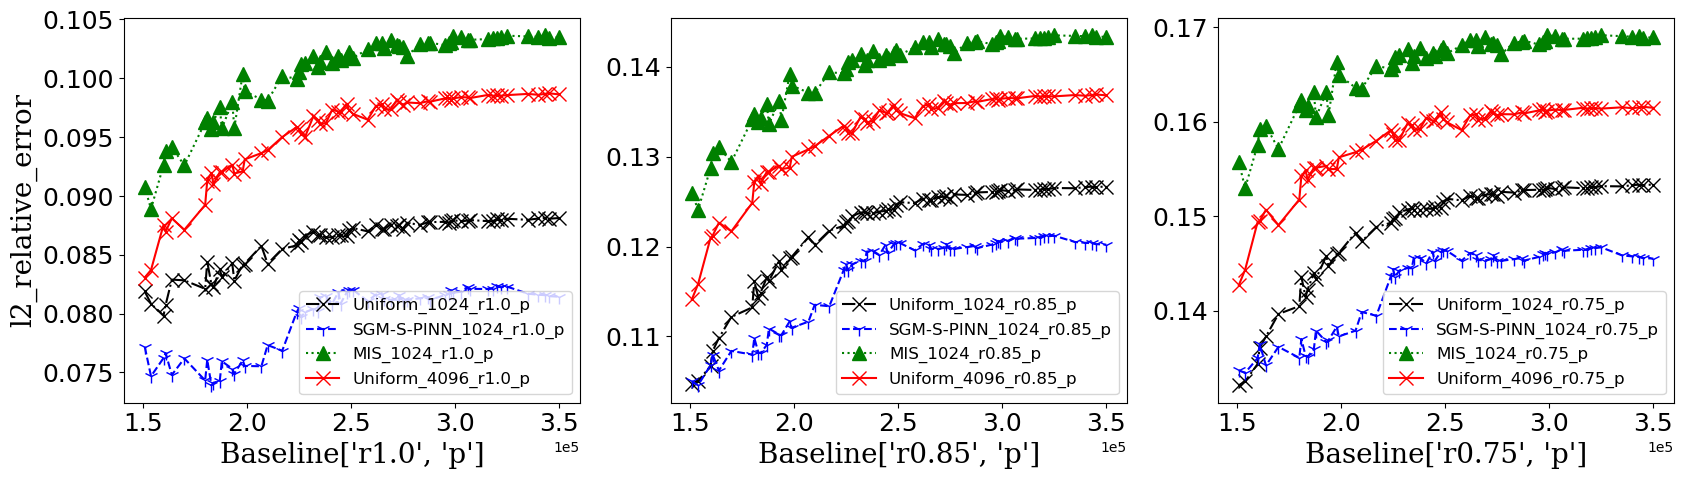

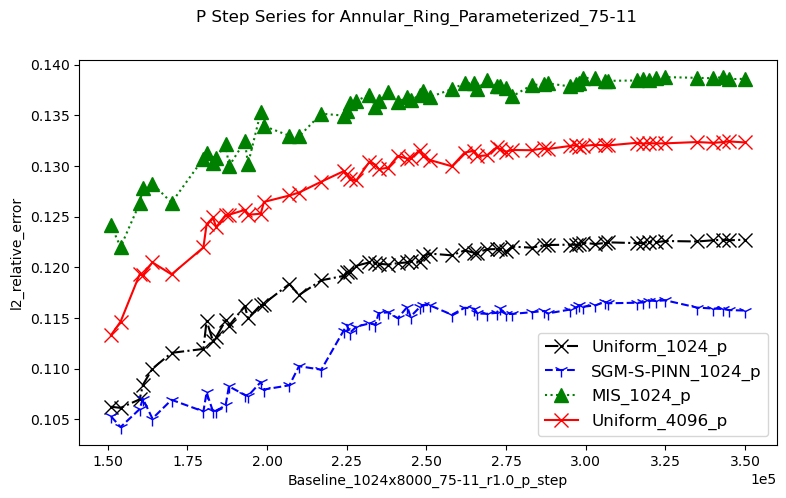

In [154]:
#plot step series p
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_p_step'] + [f'{i}_{j}_p_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
sFilter = 150000
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_p_step'] >= sFilter
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['k', 'b', 'g', 'g','r'])+
                      plt.cycler('linestyle', ['-','--',':',':','-.'])+
                      plt.cycler('marker', ['x','1','^','d','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['k', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-.','--',':','-'])+
                      plt.cycler('marker', ['x','1','^','x']))

mSize=10


plotVar = 'p'
font2 = {'family':'serif','color':'black','size':20}
manualLegend_p = [[f'{j}_{i}_{plotVar}' for j in legendNames] for i in validatorsRename.values()] ##UPDATE
manualLegend_p_agg = [f'{j}_{plotVar}' for j in legendNames] ##UPDATE

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=mSize)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        axes[k].legend(manualLegend_p[k])

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    fig.suptitle(f'P Step Series for {agNames[i]}')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_p_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_p_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes, markersize=mSize)
    axes.legend(manualLegend_p_agg)

# for i in range(len(dataframes)):
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,16))
#     #fig.suptitle(f'P step series for {agNames[i]}')
#     plt.rc('legend', fontsize = 12)
#     axes = axes.flatten()
#     axes[0].set_ylabel('l2_relative_error', fontdict=font2)
#     for k,j in enumerate(plotVars_p_allValidators):
#         set_cycler(axes[k])
#         axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
#         axes[k].tick_params(axis='both', labelsize=18)
#         print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
#         dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
#         axes[k].set_xlabel('Step_'+str(j[0].split('_')[-3:-1]), fontdict=font2)
#         #axes[k].legend(manualLegend)


#     axes[3].set_ylabel('l2_relative_error')
#     for k in range(1,len(plotVars_p_allValidators[0])):
#         set_cycler(axes[3])
#         axes[3].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
#         dataframes[i][f'{subfolders[k-1]}_p_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
#     dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_p_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes[3], markersize=10)
#     axes[3].set_xlabel('Step_[mean,p]', fontdict=font2)
#     #axes[3].legend(manualLegend_agg)

[['Baseline_1024x8000_75-11_r1.0_u_step', 'Baseline_1024x8000_75-11_r1.0_u_mean', '11-XuvYuv_lVcm_r1.0_u_mean', '11-NV-Importance_r1.0_u_mean', 'Full_Size_Baseline_75-11_r1.0_u_mean'], ['Baseline_1024x8000_75-11_r0.85_u_step', 'Baseline_1024x8000_75-11_r0.85_u_mean', '11-XuvYuv_lVcm_r0.85_u_mean', '11-NV-Importance_r0.85_u_mean', 'Full_Size_Baseline_75-11_r0.85_u_mean'], ['Baseline_1024x8000_75-11_r0.75_u_step', 'Baseline_1024x8000_75-11_r0.75_u_mean', '11-XuvYuv_lVcm_r0.75_u_mean', '11-NV-Importance_r0.75_u_mean', 'Full_Size_Baseline_75-11_r0.75_u_mean']]
[('Baseline_1024x8000_75-11_r1.0_u_step', 350000), ('Baseline_1024x8000_75-11_r1.0_u_mean', 0.0288077943027019), ('11-XuvYuv_lVcm_r1.0_u_mean', 0.0275111079216003), ('11-NV-Importance_r1.0_u_mean', 0.0299384668469429), ('Full_Size_Baseline_75-11_r1.0_u_mean', 0.0286074053496122)]
[('Baseline_1024x8000_75-11_r0.85_u_step', 350000), ('Baseline_1024x8000_75-11_r0.85_u_mean', 0.0254834938794374), ('11-XuvYuv_lVcm_r0.85_u_mean', 0.0259526

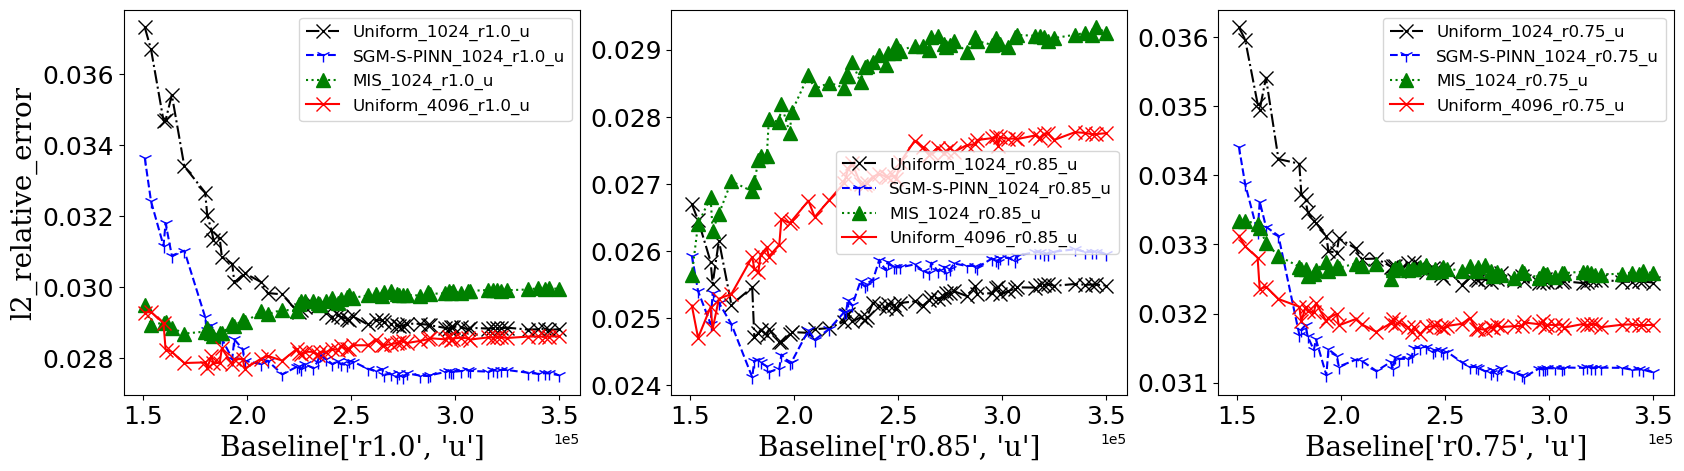

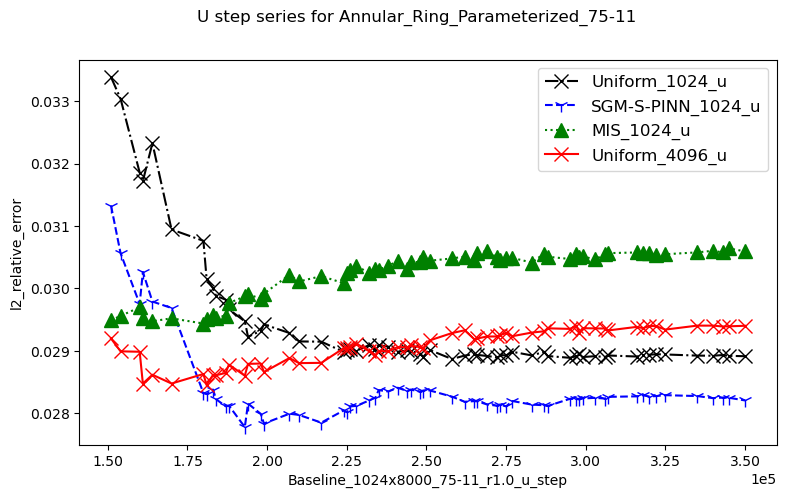

In [155]:
#plot step series u
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_u_step'] + [f'{i}_{j}_u_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_u_step'] >= sFilter
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

plotVar = 'u'
font2 = {'family':'serif','color':'black','size':20}
manualLegend_u = [[f'{j}_{i}_{plotVar}' for j in legendNames] for i in validatorsRename.values()] ##UPDATE
manualLegend_u_agg = [f'{j}_{plotVar}' for j in legendNames] ##UPDATE

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=mSize)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        axes[k].legend(manualLegend_u[k])

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    fig.suptitle(f'U step series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_u_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_u_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes, markersize=mSize)
    axes.legend(manualLegend_u_agg)

[['Baseline_1024x8000_75-11_r1.0_v_step', 'Baseline_1024x8000_75-11_r1.0_v_mean', '11-XuvYuv_lVcm_r1.0_v_mean', '11-NV-Importance_r1.0_v_mean', 'Full_Size_Baseline_75-11_r1.0_v_mean'], ['Baseline_1024x8000_75-11_r0.85_v_step', 'Baseline_1024x8000_75-11_r0.85_v_mean', '11-XuvYuv_lVcm_r0.85_v_mean', '11-NV-Importance_r0.85_v_mean', 'Full_Size_Baseline_75-11_r0.85_v_mean'], ['Baseline_1024x8000_75-11_r0.75_v_step', 'Baseline_1024x8000_75-11_r0.75_v_mean', '11-XuvYuv_lVcm_r0.75_v_mean', '11-NV-Importance_r0.75_v_mean', 'Full_Size_Baseline_75-11_r0.75_v_mean']]
[('Baseline_1024x8000_75-11_r1.0_v_step', 350000), ('Baseline_1024x8000_75-11_r1.0_v_mean', 0.0264293037354946), ('11-XuvYuv_lVcm_r1.0_v_mean', 0.0257783200591802), ('11-NV-Importance_r1.0_v_mean', 0.0260727193206548), ('Full_Size_Baseline_75-11_r1.0_v_mean', 0.0257986631244421)]
[('Baseline_1024x8000_75-11_r0.85_v_step', 350000), ('Baseline_1024x8000_75-11_r0.85_v_mean', 0.0239529177546501), ('11-XuvYuv_lVcm_r0.85_v_mean', 0.0238916

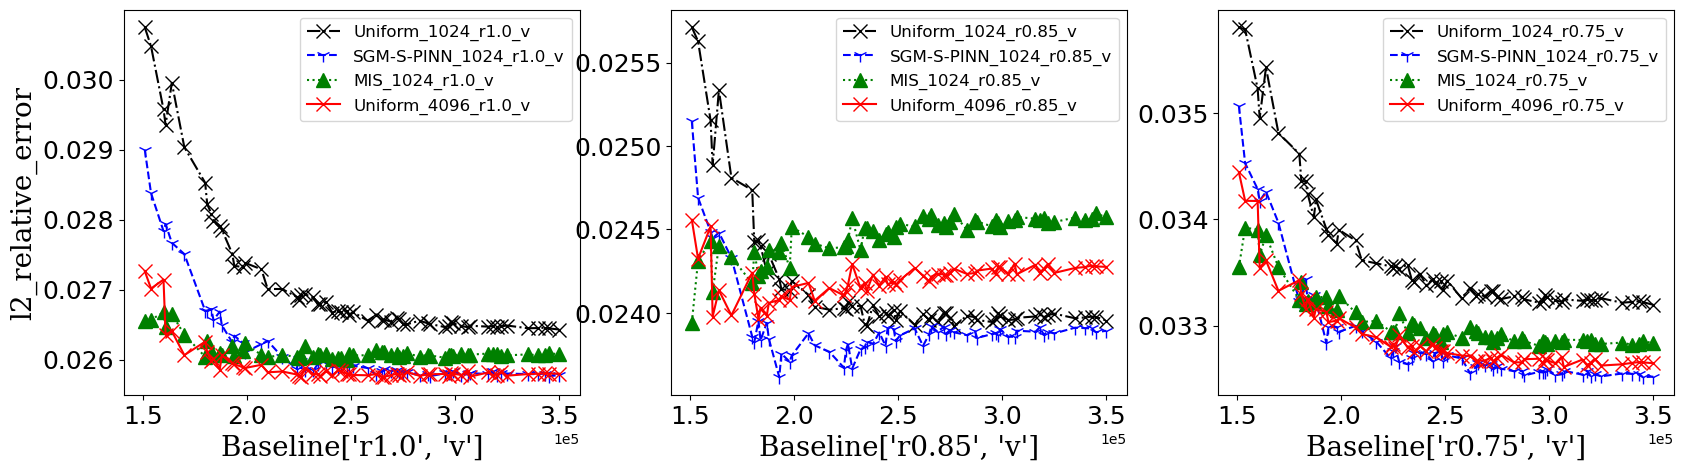

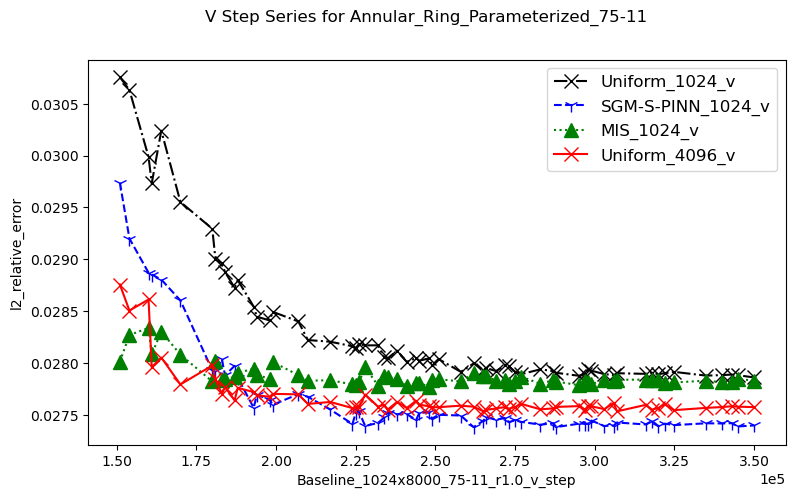

In [156]:
#plot step series v 
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_v_step'] + [f'{i}_{j}_v_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_v_step'] >= sFilter
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

plotVar = 'v'
font2 = {'family':'serif','color':'black','size':20}
manualLegend_v = [[f'{j}_{i}_{plotVar}' for j in legendNames] for i in validatorsRename.values()] ##UPDATE
manualLegend_v_agg = [f'{j}_{plotVar}' for j in legendNames] ##UPDATE

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=mSize)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        axes[k].legend(manualLegend_v[k])

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    fig.suptitle(f'V Step Series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_v_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_v_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes, markersize=mSize)
    axes.legend(manualLegend_v_agg)

In [157]:
subfolders[slice(0,2)]

['Baseline_1024x8000_75-11', '11-XuvYuv_lVcm']

[[('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_p_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r1.0_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_p_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r1.0_p_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.85_p_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.85_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_p_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.85_p_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.75_p_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.75_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_p_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.75_p_mean')]]
('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_p_mean')
2.982753561668926
('11-XuvYuv_lVcm_wall_time', '11-Xuv

C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\3861603870.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\3861603870.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\3861603870.py:19: SettingWithCopyWarning: 
A value is trying to be set on a

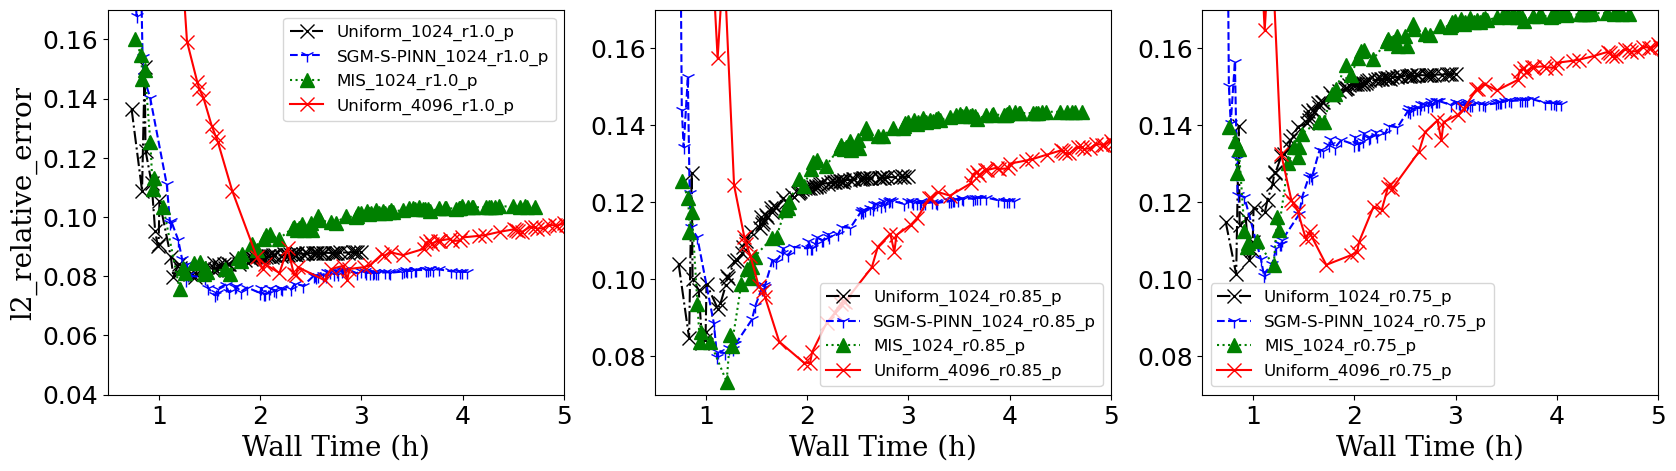

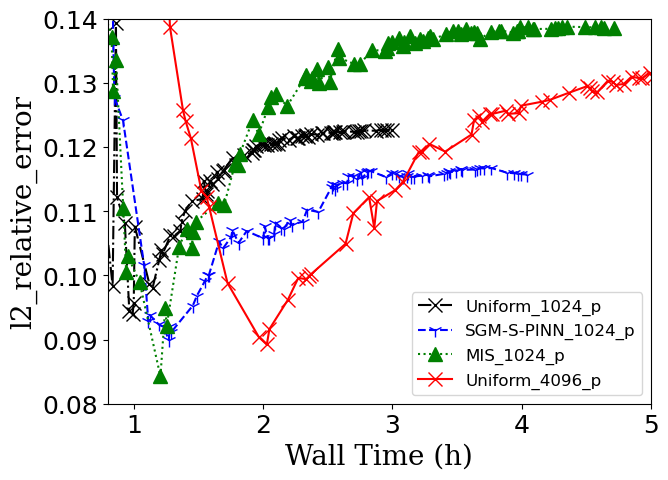

In [158]:
#plot time series p
plotVar = 'p'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
ylims = [(.11,.17),(.07,.14),(.08,.17)]
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.04,.17),(.07,.17),(.07,.17)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((.5,5))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k], markersize=mSize)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=18)
            print(l)
            time = [(q) for q in dataframes[i][l[0]]]
            print(f'{(time[-1]-time[1])/60/60}')
        axes[k].legend(manualLegend_p[k])

#plot time series p averaged
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (7,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error', fontdict=font2)
    axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
    axes.tick_params(axis='both', labelsize=18)
    axes.set_xlim((.8,5))
    axes.set_ylim((.08,.14))
    set_cycler(axes)
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))]
        l = [l[0][0]] + [j[1] for j in l]
        #print('###############################')
        #print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[1:]].mean(axis=1)
        rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=f'{subfolders[k]}_{plotVar}_mean',ax=axes, markersize=mSize)
        time = [(q) for q in dataframes[i][l[0]]]
        print(f'{(time[-1]-time[1])/60/60}')
        axes.set_xlabel('Wall Time (h)', fontdict=font2)
        axes.legend(manualLegend_p_agg)


plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    rawdat_runs = []
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))] #k is a given RUN, j is a given VALIDATOR (r1.0, r0.85, r0.75)
        l = [l[0][0]] + [l[0][1]] + [j[2] for j in l] ##step, time, r1.0, r0.85, r0.75
        print('###############################')
        print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60 #zero wall time
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[2:]].mean(axis=1) #mean of r1.0, r0.85, r0.75
        #print(rawdat)
        rawdat_runs.append(rawdat)
        time = [(q) for q in dataframes[i][l[1]]]
        print(f'{(time[-1]-time[1])/60/60}')

for i in rawdat_runs:
    keys = [list(i.columns)[1]] + [list(i.columns)[5]]
    print(keys)
    print(i[60:][keys])

[[('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_u_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r1.0_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_u_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r1.0_u_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.85_u_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.85_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_u_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.85_u_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.75_u_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.75_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_u_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.75_u_mean')]]


C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\1652604317.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\1652604317.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\1652604317.py:19: SettingWithCopyWarning: 
A value is trying to be set on a

['Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_u_mean', 'Baseline_1024x8000_75-11_r0.85_u_mean', 'Baseline_1024x8000_75-11_r0.75_u_mean']
2.982753561668926
['11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r1.0_u_mean', '11-XuvYuv_lVcm_r0.85_u_mean', '11-XuvYuv_lVcm_r0.75_u_mean']
4.0283036708169515
['11-NV-Importance_wall_time', '11-NV-Importance_r1.0_u_mean', '11-NV-Importance_r0.85_u_mean', '11-NV-Importance_r0.75_u_mean']
4.69313878721661
['Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r1.0_u_mean', 'Full_Size_Baseline_75-11_r0.85_u_mean', 'Full_Size_Baseline_75-11_r0.75_u_mean']
7.028629274368286
[[('Baseline_1024x8000_75-11_r1.0_u_step', 'Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_u_mean'), ('11-XuvYuv_lVcm_r1.0_u_step', '11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r1.0_u_mean'), ('11-NV-Importance_r1.0_u_step', '11-NV-Importance_wall_time', '11-NV-Importance_r1.0_u_mean'), ('Full_Size_Baseline_75-11_r1.0_u_step', 'Full_S

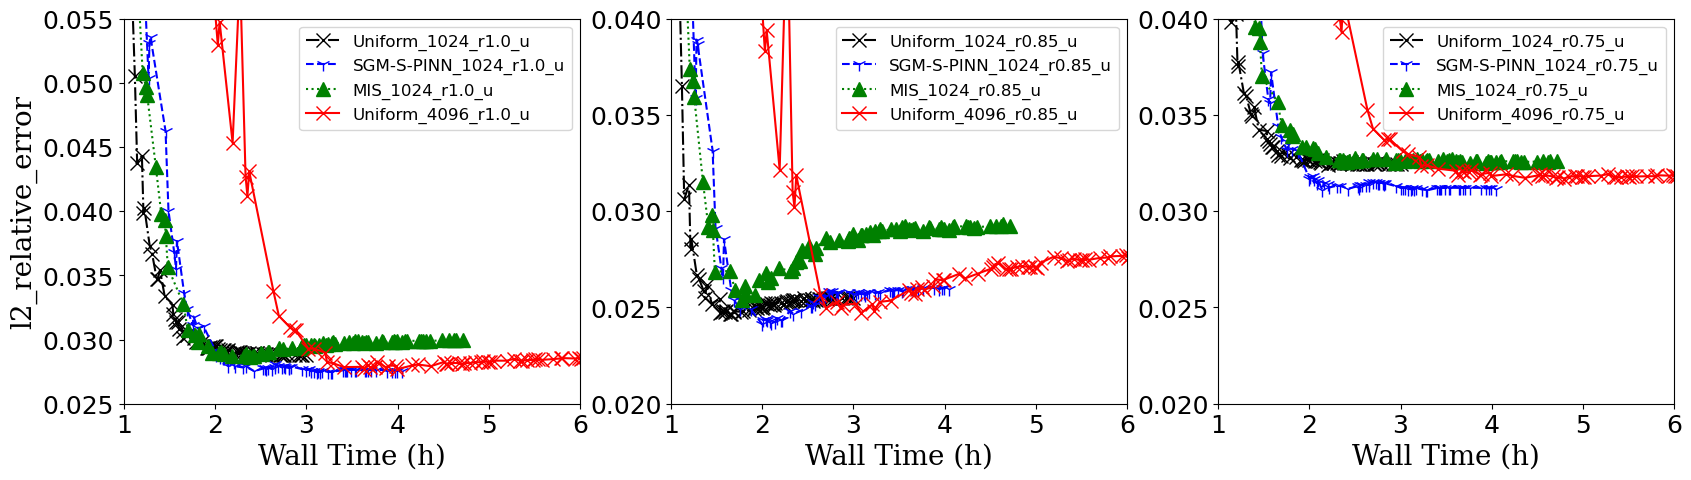

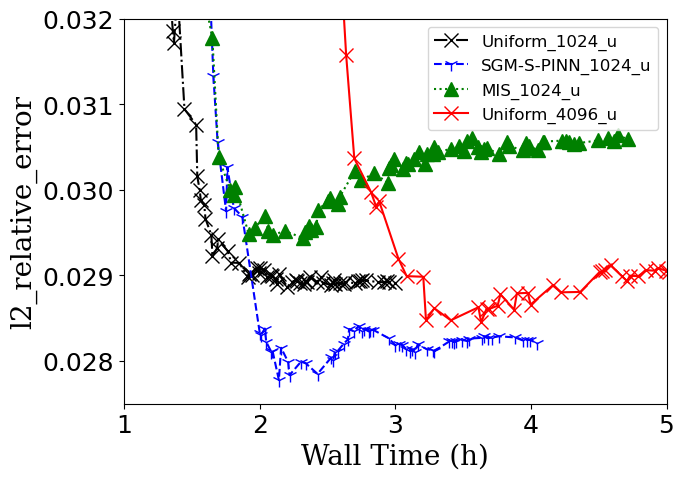

In [164]:
#plot time series u
plotVar = 'u'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
#set plotVar to uppercase
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.025,.055),(.02,.04),(.02,.04)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((1,6))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k], markersize=mSize)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=18)
        axes[k].legend(manualLegend_u[k])

#plot time series u averaged
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (7,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error', fontdict=font2)
    axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
    axes.tick_params(axis='both', labelsize=18)
    axes.set_xlim((1,5))
    axes.set_ylim((.0275,.032))
    set_cycler(axes)
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))]
        l = [l[0][0]] + [j[1] for j in l]
        #print('###############################')
        print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[1:]].mean(axis=1)
        rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=f'{subfolders[k]}_{plotVar}_mean',ax=axes, markersize=mSize)
        time = [(q) for q in dataframes[i][l[0]]]
        print(f'{(time[-1]-time[1])/60/60}')
        axes.set_xlabel('Wall Time (h)', fontdict=font2)
        axes.legend(manualLegend_u_agg)


####find mins
plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    rawdat_runs = []
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))] #k is a given RUN, j is a given VALIDATOR (r1.0, r0.85, r0.75)
        l = [l[0][0]] + [l[0][1]] + [j[2] for j in l] ##step, time, r1.0, r0.85, r0.75
        print('###############################')
        print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60 #zero wall time
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[2:]].mean(axis=1) #mean of r1.0, r0.85, r0.75
        rawdat_runs.append(rawdat)
        time = [(q) for q in dataframes[i][l[1]]]
        print(f'{(time[-1]-time[1])/60/60}')
    
    print('###############################')
    minimums = []
    for k,rawdat in enumerate(rawdat_runs):
        print(rawdat.columns)
        tm = []
        minCol = list(rawdat.columns)[-1]
        minColNum = len(list(rawdat.columns))-1
        timeCol = [j for j in list(rawdat.columns) if 'wall_time' in j][0]
        print(f'minCol, minColNum, timeCol: {minCol}, {minColNum}, {timeCol}')
        print('## min')
        tm.append(rawdat.min()[minColNum])
        print(rawdat.min()[minColNum])
        print('--idxmin')
        tm.append(rawdat.idxmin()[minColNum])
        print(rawdat.idxmin()[minColNum])
        print('--time')
        tm.append(rawdat.loc[rawdat.idxmin()[minColNum],timeCol])
        print(rawdat.loc[rawdat.idxmin()[minColNum],timeCol])
        #minimums.append((j[2],'val/idx/hr',tm))
        minimums.append(tm)
        print(minimums)

#SPADE vs baseline 4096

meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[-1][0]
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#SPADE vs Importance
meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[-2][0]
print(minimums[-2][0])
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#SPADE vs 1024
meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[0][0]
print(minimums[-2][0])
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#Importance vs baseline 4096
meanFilter = rawdat_runs[2][f'11-NV-Importance_{plotVar}_mean'] <= minimums[-1][0]
rawdat = rawdat_runs[2][['11-NV-Importance_wall_time',f'11-NV-Importance_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

print('Baseline 4096 vs Importance')
#Baseline 4096 vs Importance
meanFilter = rawdat_runs[3][f'Full_Size_Baseline_75-11_{plotVar}_mean'] <= minimums[-2][0]
rawdat = rawdat_runs[3][['Full_Size_Baseline_75-11_wall_time',f'Full_Size_Baseline_75-11_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

print('Baseline 1024 vs Importance')
#Baseline 1024 vs Importance
meanFilter = rawdat_runs[0][f'Baseline_1024x8000_75-11_{plotVar}_mean'] <= minimums[-2][0]
rawdat = rawdat_runs[0][['Baseline_1024x8000_75-11_wall_time',f'Baseline_1024x8000_75-11_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#Baseline 4096 vs 1024
meanFilter = rawdat_runs[3][f'Full_Size_Baseline_75-11_{plotVar}_mean'] <= minimums[0][0]
rawdat = rawdat_runs[3][['Full_Size_Baseline_75-11_wall_time',f'Full_Size_Baseline_75-11_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat[0:1])

[[('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r1.0_v_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r1.0_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_v_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r1.0_v_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.85_v_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.85_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_v_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.85_v_mean')], [('Baseline_1024x8000_75-11_wall_time', 'Baseline_1024x8000_75-11_r0.75_v_mean'), ('11-XuvYuv_lVcm_wall_time', '11-XuvYuv_lVcm_r0.75_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_v_mean'), ('Full_Size_Baseline_75-11_wall_time', 'Full_Size_Baseline_75-11_r0.75_v_mean')]]
2.982753561668926
4.0283036708169515
4.69313878721661
7.028629274368286
[[('Baseline_1024x8000_75-11_r1.0_v_step', 'Baseline_1024x800

C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\2192341813.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\2192341813.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_13724\2192341813.py:20: SettingWithCopyWarning: 
A value is trying to be set on a

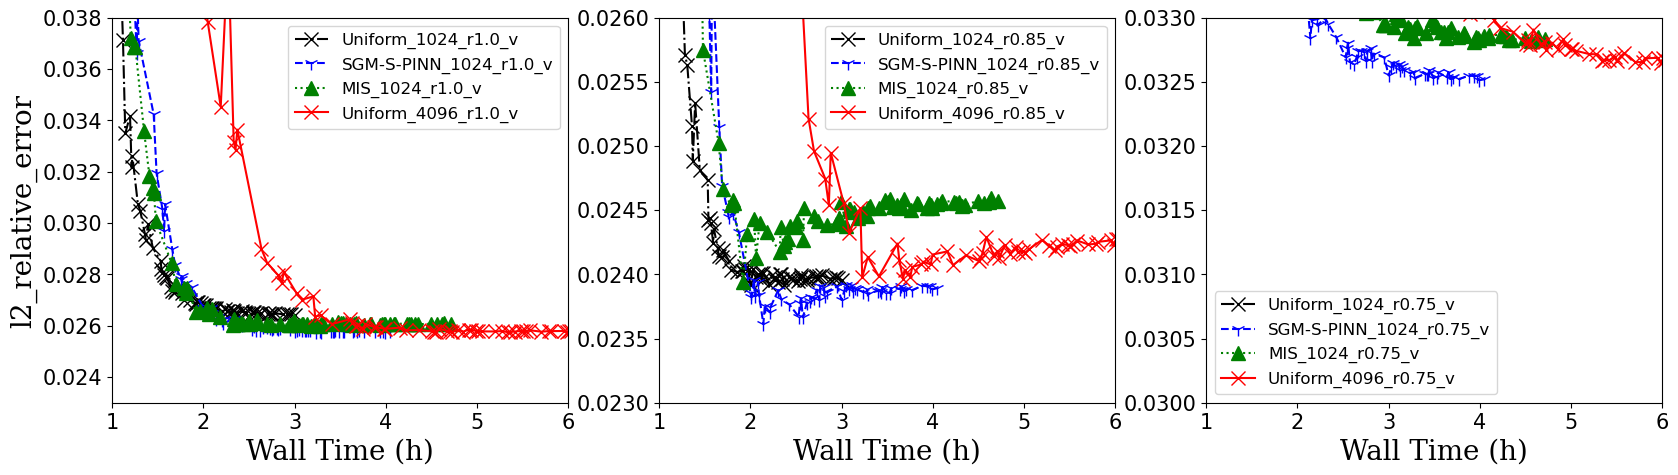

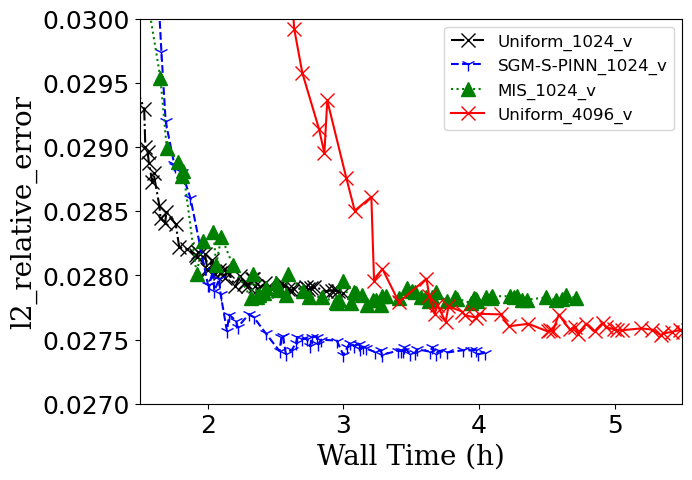

In [162]:
#plot time series v
plotVar = 'v'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
#set plotVar to uppercase
#ylims = [(.022,.05),(.022,.05),(.022,.05)]
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.023,.038),(.023,.026),(.030,.033)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((1,6))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k], markersize=mSize)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=15)
        axes[k].legend(manualLegend_v[k])


#plot time series v averaged
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (7,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error', fontdict=font2)
    axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
    axes.tick_params(axis='both', labelsize=18)
    axes.set_xlim((1.5,5.5))
    axes.set_ylim((.027,.0285))
    set_cycler(axes)
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))]
        l = [l[0][0]] + [j[1] for j in l]
        #print('###############################')
        #print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[1:]].mean(axis=1)
        rawdat[rawdat[l[0]] >= 1.1].plot(x=l[0],y=f'{subfolders[k]}_{plotVar}_mean',ax=axes, markersize=mSize)
        time = [(q) for q in dataframes[i][l[0]]]
        print(f'{(time[-1]-time[1])/60/60}')
        axes.set_xlabel('Wall Time (h)', fontdict=font2)
        axes.legend(manualLegend_v_agg)


####find mins
plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    rawdat_runs = []
    for k,j in enumerate(plotVars_p_allValidators[0]): ##k is 0-3
        l = [plotVars_p_allValidators[j][k] for j in range(len(plotVars_p_allValidators))] #k is a given RUN, j is a given VALIDATOR (r1.0, r0.85, r0.75)
        l = [l[0][0]] + [l[0][1]] + [j[2] for j in l] ##step, time, r1.0, r0.85, r0.75
        print('###############################')
        print(l)
        rawdat = dataframes[i][l]
        rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60 #zero wall time
        rawdat[f'{subfolders[k]}_{plotVar}_mean'] = dataframes[i][l[2:]].mean(axis=1) #mean of r1.0, r0.85, r0.75
        rawdat_runs.append(rawdat)
        time = [(q) for q in dataframes[i][l[1]]]
        print(f'{(time[-1]-time[1])/60/60}')
    
    print('###############################')
    minimums = []
    for k,rawdat in enumerate(rawdat_runs):
        print(rawdat.columns)
        tm = []
        minCol = list(rawdat.columns)[-1]
        minColNum = len(list(rawdat.columns))-1
        timeCol = [j for j in list(rawdat.columns) if 'wall_time' in j][0]
        print(f'minCol, minColNum, timeCol: {minCol}, {minColNum}, {timeCol}')
        print('## min')
        tm.append(rawdat.min()[minColNum])
        print(rawdat.min()[minColNum])
        print('--idxmin')
        tm.append(rawdat.idxmin()[minColNum])
        print(rawdat.idxmin()[minColNum])
        print('--time')
        tm.append(rawdat.loc[rawdat.idxmin()[minColNum],timeCol])
        print(rawdat.loc[rawdat.idxmin()[minColNum],timeCol])
        #minimums.append((j[2],'val/idx/hr',tm))
        minimums.append(tm)
        print(minimums)

#SPADE vs baseline 4096

meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[-1][0]
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#SPADE vs Importance
meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[-2][0]
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#Importance vs baseline 4096
meanFilter = rawdat_runs[2][f'11-NV-Importance_{plotVar}_mean'] <= minimums[-1][0]
rawdat = rawdat_runs[2][['11-NV-Importance_wall_time',f'11-NV-Importance_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#Baseline 4096 vs Importance
meanFilter = rawdat_runs[3][f'Full_Size_Baseline_75-11_{plotVar}_mean'] <= minimums[-2][0]
rawdat = rawdat_runs[3][['Full_Size_Baseline_75-11_wall_time',f'Full_Size_Baseline_75-11_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat)

#SPADE vs 1024
meanFilter = rawdat_runs[1][f'11-XuvYuv_lVcm_{plotVar}_mean'] <= minimums[0][0]
print(minimums[-2][0])
rawdat = rawdat_runs[1][['11-XuvYuv_lVcm_wall_time',f'11-XuvYuv_lVcm_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat[0:1])

#Importance vs 1024
meanFilter = rawdat_runs[2][f'11-NV-Importance_{plotVar}_mean'] <= minimums[0][0]
rawdat = rawdat_runs[2][['11-NV-Importance_wall_time',f'11-NV-Importance_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat[0:1])

#Baseline 4096 vs 1024
meanFilter = rawdat_runs[3][f'Full_Size_Baseline_75-11_{plotVar}_mean'] <= minimums[0][0]
rawdat = rawdat_runs[3][['Full_Size_Baseline_75-11_wall_time',f'Full_Size_Baseline_75-11_{plotVar}_mean']]
rawdat = rawdat[meanFilter]
print(rawdat[0:1])